### Assignment 2: Route Finder Using Bi-Directional BFS/DFS

Objective: Use Bi-directional BFS/DFS to solve a navigation problem.

Problem Statement: Represent a city map as a graph where intersections are nodes
and roads are edges. Find the shortest path between two locations.

Tasks:
Implement Bi-directional BFS to minimize the number of nodes explored.
Compare the performance of Bi-directional BFS with standard BFS and DFS.
Visualize the search process (e.g., using a library like networkx in Python).

Bi-directional BFS path: ['A', 'B', 'D', 'E', 'F', 'G', 'H']
Standard BFS path: ['A', 'B', 'D', 'E', 'F', 'G', 'H']
DFS path: ['A', 'C', 'D', 'E', 'F', 'G', 'H']


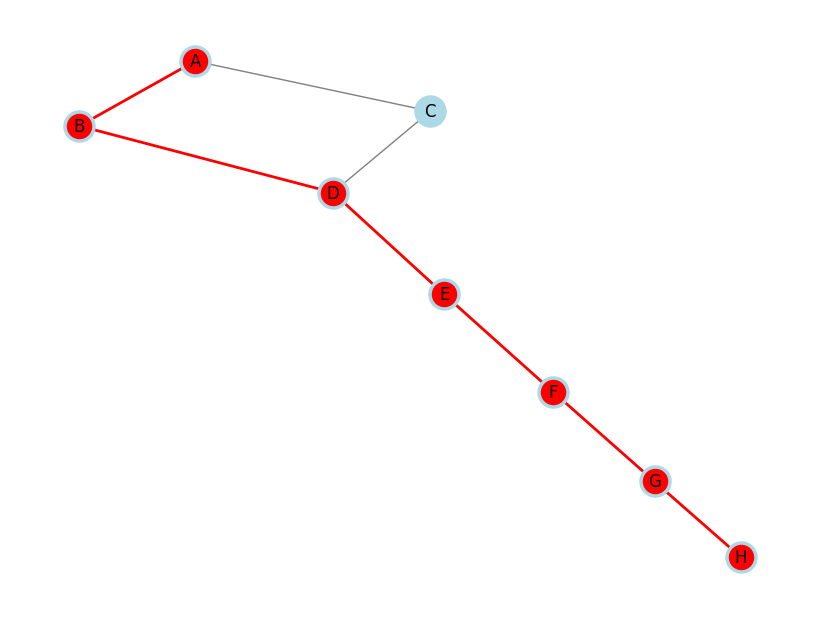

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

class GraphNavigation:
    def __init__(self, edges):
        self.graph = nx.Graph()
        self.graph.add_edges_from(edges)

    def bidirectional_bfs(self, start, goal):
        if start == goal:
            return [start]
        # Initialize frontiers
        start_frontier = {start}
        goal_frontier = {goal}
        # Parent tracking for path reconstruction
        start_parents = {start: None}
        goal_parents = {goal: None}
        while start_frontier and goal_frontier:
            # Expand start frontier
            new_start_frontier = set()
            for node in start_frontier:
                for neighbor in self.graph.neighbors(node):
                    if neighbor not in start_parents:
                        start_parents[neighbor] = node
                        new_start_frontier.add(neighbor)
                        if neighbor in goal_frontier:
                            return self._reconstruct_path(start_parents, goal_parents, neighbor)
            start_frontier = new_start_frontier
            # Expand goal frontier
            new_goal_frontier = set()
            for node in goal_frontier:
                for neighbor in self.graph.neighbors(node):
                    if neighbor not in goal_parents:
                        goal_parents[neighbor] = node
                        new_goal_frontier.add(neighbor)
                        if neighbor in start_frontier:
                            return self._reconstruct_path(start_parents, goal_parents, neighbor)
            goal_frontier = new_goal_frontier
        return None  # No path found

    def _reconstruct_path(self, start_parents, goal_parents, meeting_point):
        path = []
        node = meeting_point
        # Traverse back to the start node
        while node is not None:
            path.append(node)
            node = start_parents[node]
        path.reverse()
        # Traverse from meeting point to goal node
        node = goal_parents[meeting_point]
        while node is not None:
            path.append(node)
            node = goal_parents[node]
        return path

    def bfs(self, start, goal):
        queue = deque([start])
        parents = {start: None}
        while queue:
            node = queue.popleft()
            if node == goal:
                return self._reconstruct_path_single(parents, start, goal)
            for neighbor in self.graph.neighbors(node):
                if neighbor not in parents:
                    parents[neighbor] = node
                    queue.append(neighbor)
        return None  # No path found

    def dfs(self, start, goal):
        stack = [start]
        parents = {start: None}
        while stack:
            node = stack.pop()
            if node == goal:
                return self._reconstruct_path_single(parents, start, goal)
            for neighbor in self.graph.neighbors(node):
                if neighbor not in parents:
                    parents[neighbor] = node
                    stack.append(neighbor)
        return None  # No path found

    def _reconstruct_path_single(self, parents, start, goal):
        path = []
        node = goal
        while node is not None:
            path.append(node)
            node = parents[node]
        path.reverse()
        return path

    def visualize(self, path=None):
        pos = nx.spring_layout(self.graph)
        plt.figure(figsize=(8, 6))
        nx.draw(self.graph, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=500)
        if path:
            path_edges = list(zip(path, path[1:]))
            nx.draw_networkx_edges(self.graph, pos, edgelist=path_edges, edge_color="red", width=2)
            nx.draw_networkx_nodes(self.graph, pos, nodelist=path, node_color="red")
        plt.show()

edges = [
    ("A", "B"), ("A", "C"), ("B", "D"), ("C", "D"),
    ("D", "E"), ("E", "F"), ("F", "G"), ("G", "H")
]
navigator = GraphNavigation(edges)
start, goal = "A", "H"
print("Bi-directional BFS path:", navigator.bidirectional_bfs(start, goal))
print("Standard BFS path:", navigator.bfs(start, goal))
print("DFS path:", navigator.dfs(start, goal))
# Visualize the graph and path
navigator.visualize(navigator.bidirectional_bfs(start, goal))